In [15]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('crop_recommendation.csv')

In [17]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [18]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee
2200,80,11,13,31.000000,NaN,4.000000,100.000000,maize


In [19]:
df.size

17608

In [20]:
df.shape

(2201, 8)

In [21]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [22]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [23]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [24]:
df['label'].value_counts()

maize          101
rice           100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<AxesSubplot:>

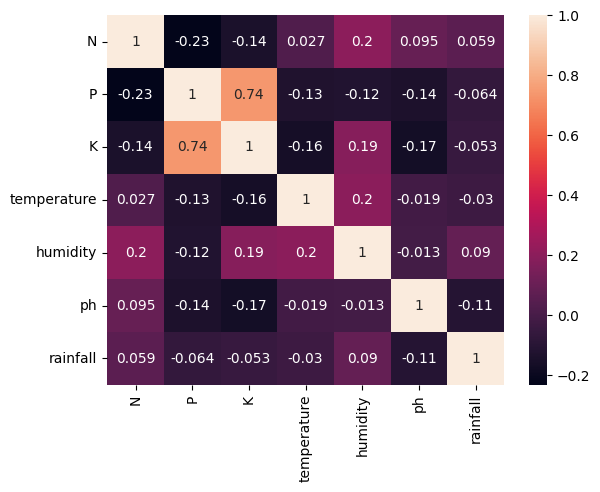

In [25]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

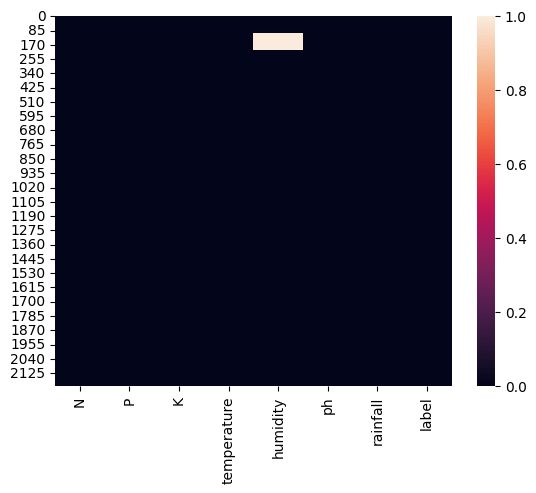

In [26]:
sns.heatmap(df.isna())

In [36]:
df=df.dropna()

### Seperating features and target label

In [37]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

In [38]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [39]:
# Initialzing empty lists to append all model's name and corresponding accuracy
acc = []
model = []

In [40]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier()

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  98.09523809523809
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       0.90      1.00      0.95        18
   blackgram       1.00      1.00      1.00        23
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        21
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.94      0.91        17
 kidneybeans       1.00      1.00      1.00        21
      lentil       0.95      0.91      0.93        22
       mango       1.00      1.00      1.00        20
   mothbeans       0.91      0.95      0.93        21
    mungbean       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00      1.00        21
      papaya       1.00      0.93

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [44]:
score

array([0.98571429, 0.99285714, 0.99285714, 0.99047619, 0.98571429])

### Saving trained Decision Tree model

In [45]:
import pickle
pickle.dump(DecisionTree, open('dt_cr.pkl','wb'))

# Guassian Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9928571428571429
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        23
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        21
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        18
        jute       0.85      1.00      0.92        17
 kidneybeans       1.00      1.00      1.00        21
      lentil       1.00      1.00      1.00        22
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        21
    mungbean       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00      1.00        21
      papaya       1.00      1.00 

In [47]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99761905, 0.99761905, 0.9952381 , 0.9952381 , 0.99047619])

### Saving trained Guassian Naive Bayes model

In [48]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '../models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [49]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9857142857142858
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        23
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        19
      coffee       0.95      1.00      0.98        21
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        18
        jute       0.80      0.94      0.86        17
 kidneybeans       1.00      1.00      1.00        21
      lentil       1.00      0.95      0.98        22
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        21
    mungbean       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00      1.00        21
      papaya       1.00      1.00      1.0

In [50]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97857143, 0.98095238, 0.99285714, 0.99047619, 0.98095238])

In [51]:
#Saving trained SVM model

# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9714285714285714
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       0.95      1.00      0.97        18
   blackgram       0.88      0.96      0.92        23
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        19
      coffee       0.95      1.00      0.98        21
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        18
        jute       0.80      0.94      0.86        17
 kidneybeans       1.00      1.00      1.00        21
      lentil       0.95      0.86      0.90        22
       mango       1.00      1.00      1.00        20
   mothbeans       0.90      0.90      0.90        21
    mungbean       1.00      0.95      0.98        21
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00      1.00        21
      papaya       1.00   

In [53]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96904762, 0.95714286, 0.96904762, 0.96666667])

### Saving trained Logistic Regression model

# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9833333333333333
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        23
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        21
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        18
        jute       0.81      1.00      0.89        17
 kidneybeans       1.00      1.00      1.00        21
      lentil       0.95      0.91      0.93        22
       mango       1.00      1.00      1.00        20
   mothbeans       0.91      0.95      0.93        21
    mungbean       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00      1.00        21
      papaya       1.00      1.00      1.00

In [55]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.9952381 , 0.99285714, 0.9952381 , 0.9952381 , 0.98809524])

### Saving trained Random Forest model

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

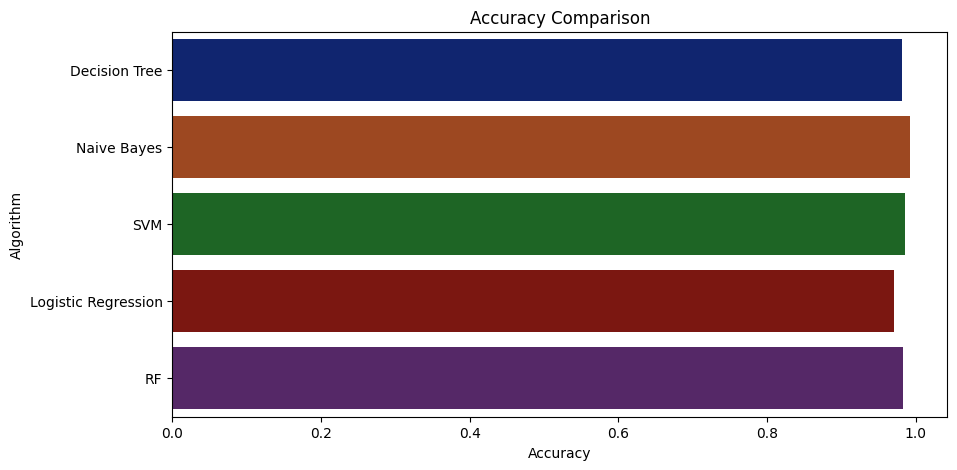

In [56]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [57]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9809523809523809
Naive Bayes --> 0.9928571428571429
SVM --> 0.9857142857142858
Logistic Regression --> 0.9714285714285714
RF --> 0.9833333333333333


## Making a prediction

In [58]:
print(df.columns)
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)[0]
print(prediction)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')
coffee


In [59]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['coffee']
